# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:

**Note: if you are using the Udacity workspace, you *DO NOT* need to re-download these - they can be found in the `/data` folder as noted in the cell below.**

* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dog_images`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [1]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("/data/lfw/*/*"))
dog_files = np.array(glob("/data/dog_images/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


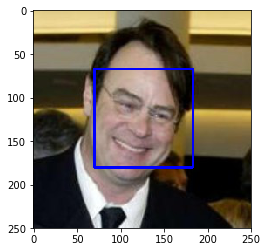

In [2]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[0])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [3]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 
(You can print out your results and/or write your percentages in this cell)

In [4]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.

human_face_detector_perf = np.sum([face_detector(file) for file in human_files_short])/len(human_files_short)*100
dog_face_detector_perf = np.sum([face_detector(file) for file in dog_files_short])/len(dog_files_short)*100
print("Human Face Detector Performance in % :", human_face_detector_perf, " VS Dog Face Detector Performance in %", dog_face_detector_perf)

Human Face Detector Performance in % : 98.0  VS Dog Face Detector Performance in % 17.0


We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [5]:
### (Optional) 
### TODO: Test performance of anotherface detection algorithm.
### Feel free to use as many code cells as needed.

#Installation dlib library : pip install dlib
import sys
!{sys.executable} -m pip install dlib

    100% |████████████████████████████████| 3.2MB 10.1MB/s ta 0:00:01
  Running setup.py bdist_wheel for dlib ... done
  Stored in directory: /root/.cache/pip/wheels/96/ac/11/8aadec62cb4fb5b264a9b1b042caf415de9a75f5e165d79a51
Successfully built dlib


In [ ]:
import dlib
face_detect = dlib.get_frontal_face_detector()

def hog_face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_detect(gray,1)
    return len(faces) > 0

human_face_hog_detector_perf = np.sum([hog_face_detector(file) for file in human_files_short])/len(human_files_short)*100
dog_face_hog_detector_perf = np.sum([hog_face_detector(file) for file in dog_files_short])/len(dog_files_short)*100
print("Human Face Detector Performance in % :", human_face_hog_detector_perf, " VS Dog Face Detector Performance in %", dog_face_hog_detector_perf)

---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [13]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()

Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [ ]:
from PIL import Image
import torchvision.transforms as transforms
from torch.autograd import Variable

def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
    
    img = Image.open(img_path)
    
    # Defining of images Transformations  to do : Croping/resizing, tensor & normalizing
    # cf https://pytorch.org/docs/master/torchvision/models.html
    min_img_size = 224  # The min size, as noted in the PyTorch pretrained models doc, is 224 px.
    transform_pipeline = transforms.Compose([transforms.CenterCrop(min_img_size),
                                             transforms.ToTensor(),
                                             transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                                 std=[0.229, 0.224, 0.225])])
   
    # Preprocessing of images transformations
    img_tensor = transform_pipeline(img).float()
    
    # Adding an extra dimension cf doc Pytorch
    img_tensor = img_tensor.unsqueeze_(0)
    
    # Converting our image_tensor into a variable as Pytorch models expect inputs to be Variables 
    if use_cuda:
        img = Variable(img_tensor.cuda())
    else :
        img = Variable(img_tensor)
    
    # Switching of Model in evaluation mode
    VGG16.eval()
    
    # Predicting the category of image
    prediction = VGG16(img)  # Returns a Tensor of shape (batch, num class labels)
    prediction = prediction.cpu()
    index_prediction = prediction.data.numpy().argmax()
    
    return index_prediction # predicted class index 
    

In [ ]:
print(VGG16_predict(dog_files_short[16]), VGG16_predict(human_files_short[16]))
print(VGG16_predict(dog_files_short[14]), VGG16_predict(human_files_short[14]))

### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [ ]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    ## TODO: Complete the function.
    
    # Check the dogs categories in the labels of Imagenet : https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a 
    categories = VGG16_predict(img_path) 
    if  150 < categories < 269 :
        return True
    else:
        return False

In [ ]:
print(dog_detector(dog_files_short[14]), dog_detector(human_files_short[14]))

### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ 


In [ ]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.
human_face_dog_detector_perf = np.sum([int(dog_detector(file)) for file in human_files_short])/len(human_files_short)*100
dog_face_dog_detector_perf = np.sum([int(dog_detector(file)) for file in dog_files_short])/len(dog_files_short)*100
print("Performance in percentage of dogs detected from human face dataset :", human_face_dog_detector_perf, "%")
print("Performance in percentage of dogs detected from dog face dataset :", dog_face_dog_detector_perf, "%")

We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

# Data Exploration & Visualization

I analyzed our data. In order to appreciate the quality of our data, I paid attention to the size of our images & the number of available images per breed. I hope that this exploration step would allow to detect potential biais in our dataset.

### Number of images per breed

In [71]:
import os
dir = "/data/dog_images/train"
dogdata_path = os.listdir(dir)

In [74]:
dog_breed_dict = dict((breed, 0) for breed in dogdata_path)

for breed in dog_breed_dict.keys():
    img_path = dir + '/' + breed
    dog_breed_dict[breed] = len(os.listdir(img_path))

In [70]:
frequencies = list(dog_breed_dict.values())
freq_series = pd.Series(frequencies)
y_labels = dog_breed_dict.keys()

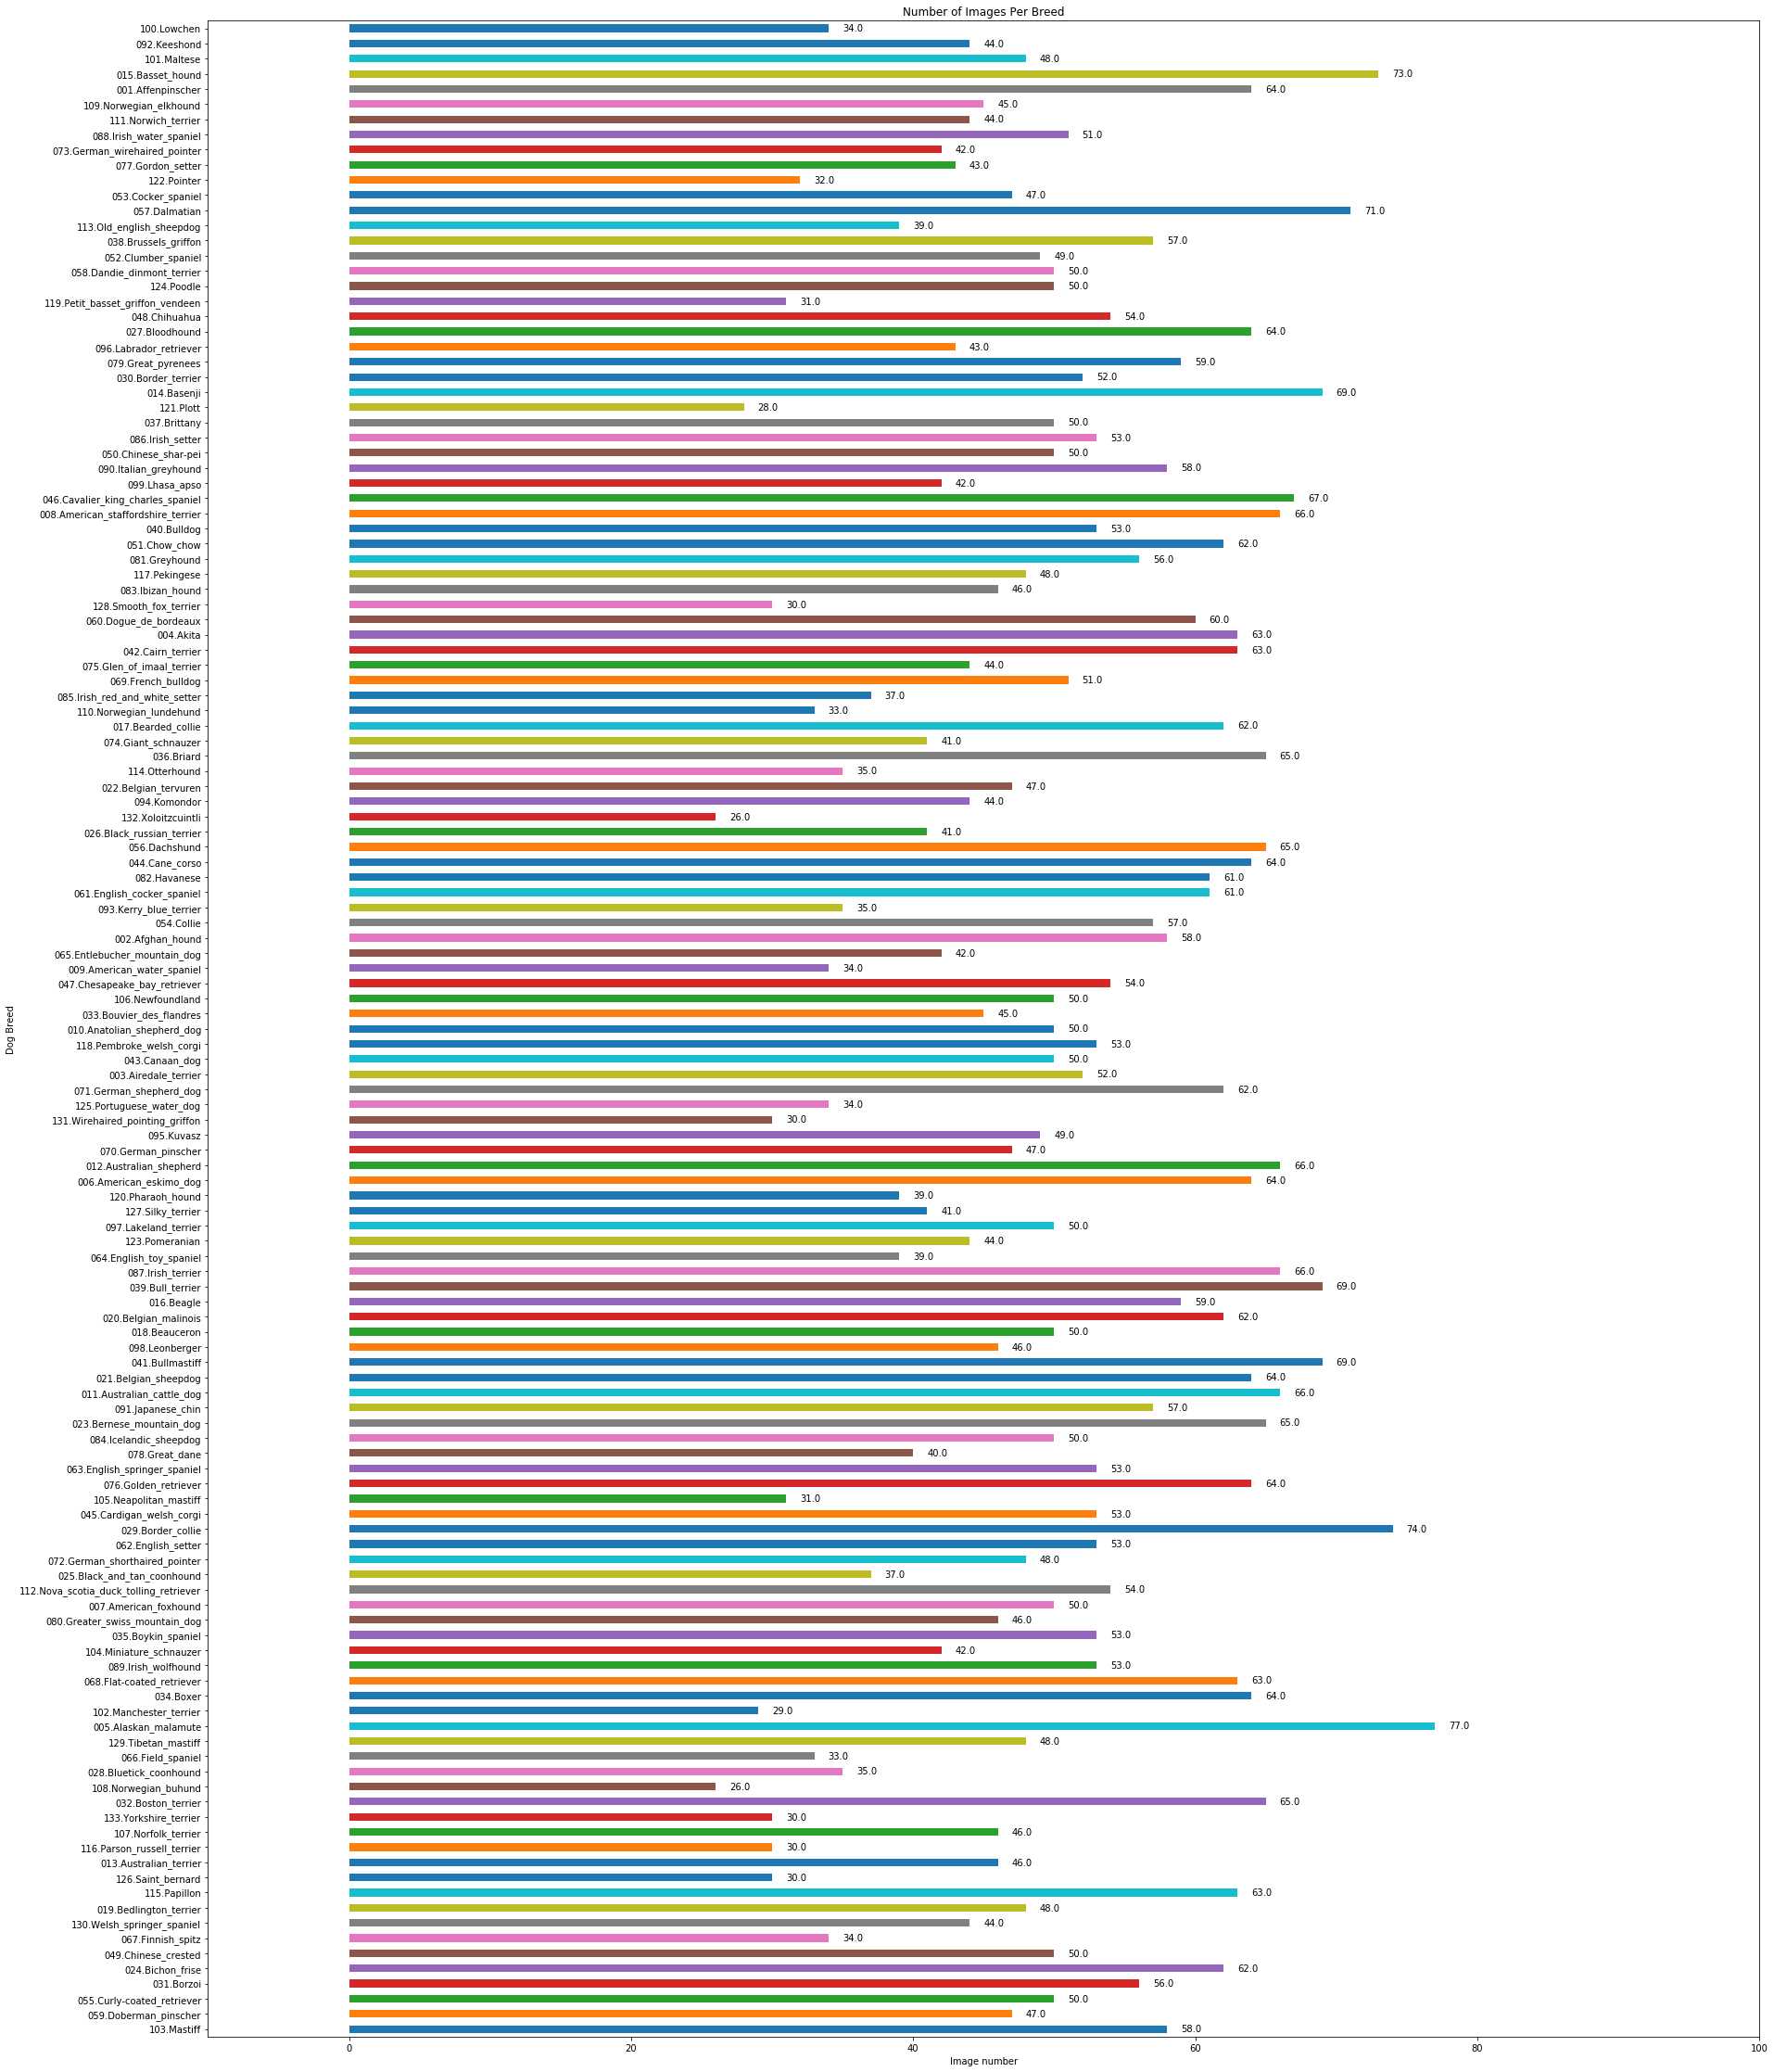

In [69]:
# Plot the figure.
plt.figure(figsize=(30, 40))
ax = freq_series.plot(kind='barh')
ax.set_title('Number of Images Per Breed')
ax.set_xlabel('Image number')
ax.set_ylabel('Dog Breed')
ax.set_yticklabels(y_labels)
ax.set_xlim(-10, 100) # expand xlim to make labels easier to read

rects = ax.patches

# For each bar: Place a label
for rect in rects:
    # Get X and Y placement of label from rect.
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2

    # Number of points between bar and label. Change to your liking.
    space = 15
    # Vertical alignment for positive values
    ha = 'left'

    # If value of bar is negative: Place label left of bar
    if x_value < 0:
        # Invert space to place label to the left
        space *= -1
        # Horizontally align label at right
        ha = 'right'

    # Use X value as label and format number with one decimal place
    label = "{:.1f}".format(x_value)

    # Create annotation
    plt.annotate(
        label,                      # Use `label` as label
        (x_value, y_value),         # Place label at end of the bar
        xytext=(space, 0),          # Horizontally shift label by `space`
        textcoords="offset points", # Interpret `xytext` as offset in points
        va='center',                # Vertically center label
        ha=ha)                      # Horizontally align label differently for
                                    # positive and negative values.

plt.savefig("image.png")

In [93]:
dog_breed_df = pd.DataFrame(list(dog_breed_dict.values()), index= dog_breed_dict.keys(),columns=['Images_Number per Breed'])
dog_breed_df

,Images_Number per Breed
103.Mastiff,58
059.Doberman_pinscher,47
055.Curly-coated_retriever,50
031.Borzoi,56
024.Bichon_frise,62
049.Chinese_crested,50
067.Finnish_spitz,34
130.Welsh_springer_spaniel,44
019.Bedlington_terrier,48
115.Papillon,63


In [99]:
dog_breed_df['Images_Number per Breed'].describe()

count    133.000000
mean      50.225564
std       11.863885
min       26.000000
25%       42.000000
50%       50.000000
75%       61.000000
max       77.000000
Name: Images_Number per Breed, dtype: float64

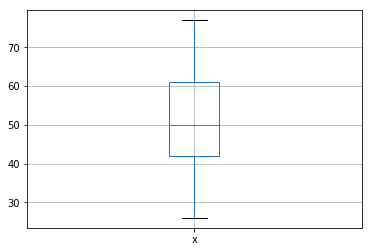

In [101]:
pd.plotting.boxplot(pd.Series(dog_breed_df['Images_Number per Breed']))

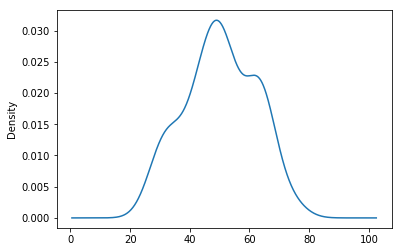

In [104]:
serie = dog_breed_df['Images_Number per Breed']
serie.plot.density()

Even if I noted that certain breeds are  more represented in our dataset, I expect that this should not have an impact on my results. Ideally I'll analyze my results of model to check if I'm able to detect some curious predictions.

### Size of our dog images

In [106]:
image_size_dict = dict()


for img_path in dog_files:
    img = cv2.imread(img_path)
    #print(img.shape)
    if img.shape not in image_size_dict.keys():
        image_size_dict[img.shape] = 1
    else :
        image_size_dict[img.shape] += 1

print(image_size_dict)

{(648, 800, 3): 1,
 (307, 300, 3): 2,
 (433, 250, 3): 1,
 (2304, 3072, 3): 8,
 (395, 400, 3): 2,
 (358, 500, 3): 4,
 (640, 480, 3): 283,
 (933, 1064, 3): 1,
 (594, 556, 3): 1,
 (594, 396, 3): 1,
 (800, 571, 3): 4,
 (500, 445, 3): 2,
 (500, 456, 3): 2,
 (512, 640, 3): 10,
 (428, 640, 3): 26,
 (556, 290, 3): 1,
 (1059, 800, 3): 1,
 (640, 425, 3): 13,
 (480, 640, 3): 476,
 (491, 640, 3): 2,
 (2021, 1829, 3): 1,
 (330, 495, 3): 1,
 (640, 479, 3): 4,
 (640, 469, 3): 3,
 (640, 621, 3): 1,
 (500, 489, 3): 2,
 (1153, 1732, 3): 1,
 (1436, 1931, 3): 1,
 (761, 577, 3): 1,
 (1382, 1843, 3): 1,
 (640, 481, 3): 5,
 (798, 640, 3): 1,
 (640, 512, 3): 12,
 (423, 639, 3): 1,
 (837, 984, 3): 1,
 (427, 639, 3): 2,
 (284, 300, 3): 1,
 (640, 426, 3): 24,
 (390, 497, 3): 1,
 (430, 640, 3): 2,
 (428, 636, 3): 1,
 (750, 602, 3): 1,
 (296, 397, 3): 1,
 (839, 600, 3): 1,
 (294, 392, 3): 1,
 (598, 424, 3): 1,
 (1750, 2614, 3): 1,
 (640, 536, 3): 2,
 (799, 1200, 3): 1,
 (217, 235, 3): 1,
 (598, 456, 3): 1,
 (344, 

In [108]:
print("Number of different image sizes :", len(image_size_dict))

Number of different image sizes : 4216


Concerning the sizes of our images, I'm able to conclude that our dataset is composed of different image sizes. Therefore, I expect it will be necessary & useful to resize each image before to use them in my models.   

---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dog_images/train`, `dog_images/valid`, and `dog_images/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [14]:
import os
from torchvision import datasets

from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes

# Parameters  
batch_size = 20
shuffle =  True
num_workers = 0

# Defining the directories of our datasets
data_dir = '/data/dog_images/'
train = "train"
valid = "valid"
test = "test"

# Using the same steps that steps used in the following tutorial :  
# https://www.kaggle.com/carloalbertobarbano/vgg16-transfer-learning-pytorch

data_transforms = {
    "train": transforms.Compose([
        # Data augmentation is a good practice for the train set
        # Here, we randomly crop the image to 224x224 and
        # randomly flip it horizontally. 
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                              std=[0.229, 0.224, 0.225])
    ]),
    "valid": transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                              std=[0.229, 0.224, 0.225])
    ]),
    "test": transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                              std=[0.229, 0.224, 0.225])
    ])
}

image_datasets = {
    x: datasets.ImageFolder(
        os.path.join(data_dir, x),       
        transform=data_transforms[x]
    )
    for x in ["train", "valid", "test"]
}




train_loader = torch.utils.data.DataLoader(image_datasets["train"],
                                           batch_size=batch_size, 
                                           num_workers=num_workers,
                                           shuffle=True)
valid_loader = torch.utils.data.DataLoader(image_datasets["valid"],
                                           batch_size=batch_size, 
                                           num_workers=num_workers,
                                           shuffle=False)
test_loader = torch.utils.data.DataLoader(image_datasets["test"],
                                           batch_size=batch_size, 
                                           num_workers=num_workers,
                                           shuffle=False)
data_loaders = {
    'train': train_loader,
    'valid': valid_loader,
    'test': test_loader
}
    

dataset_sizes = {x: len(image_datasets[x]) for x in ["train", "valid", "test"]}

for x in ["train", "valid", "test"]:
    print("Loaded {} images under {}".format(dataset_sizes[x], x))
    
print("Classes: ")
class_names = image_datasets["train"].classes
print(len(class_names))
print(image_datasets["train"].classes)

Loaded 6680 images under train
Loaded 835 images under valid
Loaded 836 images under test
Classes: 
133
['001.Affenpinscher', '002.Afghan_hound', '003.Airedale_terrier', '004.Akita', '005.Alaskan_malamute', '006.American_eskimo_dog', '007.American_foxhound', '008.American_staffordshire_terrier', '009.American_water_spaniel', '010.Anatolian_shepherd_dog', '011.Australian_cattle_dog', '012.Australian_shepherd', '013.Australian_terrier', '014.Basenji', '015.Basset_hound', '016.Beagle', '017.Bearded_collie', '018.Beauceron', '019.Bedlington_terrier', '020.Belgian_malinois', '021.Belgian_sheepdog', '022.Belgian_tervuren', '023.Bernese_mountain_dog', '024.Bichon_frise', '025.Black_and_tan_coonhound', '026.Black_russian_terrier', '027.Bloodhound', '028.Bluetick_coonhound', '029.Border_collie', '030.Border_terrier', '031.Borzoi', '032.Boston_terrier', '033.Bouvier_des_flandres', '034.Boxer', '035.Boykin_spaniel', '036.Briard', '037.Brittany', '038.Brussels_griffon', '039.Bull_terrier', '040.Bu

**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**: Globally I decided to resize, to transform the images to tensors & to normalize them. More precisely, for valid & tests data I resized to 256 & then centered cropped to 224x224 with the method "RandomResisedCrop". But for my train data, I only centered crop each image to 224x224. To improve the performance of my model & limit a potential overfitting I also proceeded to data augmentation with a random horizontal flip of my train data.

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [15]:
import torch.nn as nn
import torch.nn.functional as F

num_classes = len(class_names)

# define the CNN architecture
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        
        ## Define layers of a CNN
        self.cnn_layers = nn.Sequential(
            # Defining a 2D convolution layer : conv1
            nn.Conv2d(3, 32, kernel_size=3, stride=2, padding=1),
            nn.ReLU(inplace=True),
            nn.BatchNorm2d(32),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout(p=0.25),
                       
            # Defining conv2
            nn.Conv2d(32, 64, kernel_size=3, stride=2, padding=1),
            nn.ReLU(inplace=True),
            nn.BatchNorm2d(64),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout(p=0.25),
         
            # Defining conv3
            nn.Conv2d(64,128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.BatchNorm2d(128),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout(p=0.25)
        )

        self.linear_layers = nn.Sequential(
            nn.Linear(128 * 7 * 7, 500),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(500, num_classes)
            
        )

    
    def forward(self, x):
        ## Define forward behavior
        x = self.cnn_layers(x)
        x = x.view(-1, 128 * 7 * 7)
        x = self.linear_layers(x)
        return x

#-#-# You so NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()
print(model_scratch)

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

Net(
  (cnn_layers): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): ReLU(inplace)
    (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Dropout(p=0.25)
    (5): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (6): ReLU(inplace)
    (7): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (9): Dropout(p=0.25)
    (10): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Dropout(p=0.25)
  )
  (linear_layers): Sequential(
    (0): Linear(in_features=6272, out_

__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__ As our task of dog breed classification is complex, I decided to start directly with a CNN with 3 conv2D layers & 2 linear layers. Between each layers I applied a dropout with a proba of 0.25 to limit overfitting. I followed the example of CNN architecture built in our extracurriculum for the CIFAR classification but I applied a stride of 2 & a padding of 1. I think a good idea was to select an adaptive optimizer (more precisely Adamax) because it was very effective.

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [16]:
import torch.optim as optim

learning_rate = 0.002

### TODO: select loss function
criterion_scratch = nn.CrossEntropyLoss()

### TODO: select optimizer
optimizer_scratch = optim.Adamax(model_scratch.parameters(), lr=learning_rate)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [17]:
def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            # clear the gradients of all optimized variables
            optimizer.zero_grad()
            # forward pass: compute predicted outputs by passing inputs to the model
            output = model(data)
            # calculate the batch loss
            loss = criterion(output, target)
            # backward pass: compute gradient of the loss with respect to model parameters
            loss.backward()
            # perform a single optimization step (parameter update)
            optimizer.step()
            # update training loss
            train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss         
            # forward pass: compute predicted outputs by passing inputs to the model
            output = model(data)
            # calculate the batch loss
            loss = criterion(output, target)
            # update average validation loss 
            valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (loss.data - valid_loss))
        
         # calculate average losses
        train_loss = train_loss/len(train_loader.sampler)
        valid_loss = valid_loss/len(valid_loader.sampler)
            
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss <= valid_loss_min:
            print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
                valid_loss_min,
                valid_loss))
            torch.save(model.state_dict(), save_path)
            valid_loss_min = valid_loss


    # return trained model
    return model

In [18]:
# train the model
n_epochs = 50
loaders_scratch = data_loaders

model_scratch = train(n_epochs, loaders_scratch, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'model_scratch.pt')

Epoch: 1 	Training Loss: 0.000740 	Validation Loss: 0.005596
Validation loss decreased (inf --> 0.005596).  Saving model ...
Epoch: 2 	Training Loss: 0.000713 	Validation Loss: 0.005461
Validation loss decreased (0.005596 --> 0.005461).  Saving model ...
Epoch: 3 	Training Loss: 0.000698 	Validation Loss: 0.005325
Validation loss decreased (0.005461 --> 0.005325).  Saving model ...
Epoch: 4 	Training Loss: 0.000688 	Validation Loss: 0.005202
Validation loss decreased (0.005325 --> 0.005202).  Saving model ...
Epoch: 5 	Training Loss: 0.000678 	Validation Loss: 0.005094
Validation loss decreased (0.005202 --> 0.005094).  Saving model ...
Epoch: 6 	Training Loss: 0.000666 	Validation Loss: 0.004986
Validation loss decreased (0.005094 --> 0.004986).  Saving model ...
Epoch: 7 	Training Loss: 0.000658 	Validation Loss: 0.005029
Epoch: 8 	Training Loss: 0.000650 	Validation Loss: 0.004885
Validation loss decreased (0.004986 --> 0.004885).  Saving model ...
Epoch: 9 	Training Loss: 0.000641 

In [19]:
# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [20]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))


In [21]:
# call test function    
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 2.980422


Test Accuracy: 26% (223/836)


---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [38]:
## TODO: Specify data loaders

# Parameters  
batch_size = 8
num_workers = 0


train_loader = torch.utils.data.DataLoader(image_datasets["train"],
                                           batch_size=batch_size, 
                                           num_workers=num_workers,
                                           shuffle=True)
valid_loader = torch.utils.data.DataLoader(image_datasets["valid"],
                                           batch_size=batch_size, 
                                           num_workers=num_workers,
                                           shuffle=False)
test_loader = torch.utils.data.DataLoader(image_datasets["test"],
                                           batch_size=batch_size, 
                                           num_workers=num_workers,
                                           shuffle=False)
transfer_data_loaders = {
    'train': train_loader,
    'valid': valid_loader,
    'test': test_loader
}
    

dataset_sizes = {x: len(image_datasets[x]) for x in ["train", "valid", "test"]}

for x in ["train", "valid", "test"]:
    print("Loaded {} images under {}".format(dataset_sizes[x], x))


Loaded 6680 images under train
Loaded 835 images under valid
Loaded 836 images under test


### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [39]:
import torchvision.models as models
import torch.nn as nn

## TODO: Specify model architecture 
#model_transfer = models.resnet152(pretrained=True)
model_transfer = models.resnet50(pretrained=True)
print(model_transfer)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.torch/models/resnet50-19c8e357.pth
100%|██████████| 102502400/102502400 [00:02<00:00, 39467626.80it/s]


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=F

In [40]:
for param in model_transfer.parameters():
    param.requires_grad = False

num_ftrs = model_transfer.fc.in_features
print("num_ftrs :", num_ftrs)
model_transfer.fc = nn.Linear(num_ftrs, num_classes, bias=True)

if use_cuda:
    model_transfer = model_transfer.cuda()

num_ftrs : 2048


In [41]:
fc_parameters = model_transfer.fc.parameters()
for param in fc_parameters:
    param.requires_grad = True

__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ I based my final CNN architecture on a resnet (more precisely resnet50). I started to try the pretrained model, resnet150 which is bigger & in general more effective for image classification tasks than resnet50 but I encountered memory errors. So I decided to use a smaller architecture & I used resnet50.

I only modified the last layer to adapt the output layer to our problem of dog bred classification with 133 classes.

In this kind of image classification task, I think it's often very reliable to use a transfer learning to improve accuracy of our model & reduce training time (which would be very long without the use of a pretrained model).  


### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [42]:
criterion_transfer = nn.CrossEntropyLoss()
optimizer_transfer = optim.Adamax(model_transfer.fc.parameters(), lr=learning_rate)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [43]:
def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()

            # initialize weights to zero
            optimizer.zero_grad()
            
            output = model(data)
            
            # calculate loss
            loss = criterion(output, target)
            
            # back prop
            loss.backward()
            
            # grad
            optimizer.step()
            
            train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
            if batch_idx % 100 == 0:
                print('Epoch %d, Batch %d loss: %.6f' %
                  (epoch, batch_idx + 1, train_loss))
        
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
            output = model(data)
            loss = criterion(output, target)
            valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (loss.data - valid_loss))

            
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss < valid_loss_min:
            torch.save(model.state_dict(), save_path)
            print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
            valid_loss_min,
            valid_loss))
            valid_loss_min = valid_loss
            
    # return trained model
    return model

In [44]:
# train the model
n_epochs = 20
loaders_transfer = transfer_data_loaders

model_transfer = train(n_epochs, 
                       loaders_transfer, 
                       model_transfer, 
                       optimizer_transfer, 
                       criterion_transfer, 
                       use_cuda, 
                       'model_transfer.pt')

Epoch 1, Batch 1 loss: 5.012342
Epoch 1, Batch 101 loss: 5.123096
Epoch 1, Batch 201 loss: 4.515613
Epoch 1, Batch 301 loss: 4.156640
Epoch 1, Batch 401 loss: 3.885939
Epoch 1, Batch 501 loss: 3.672861
Epoch 1, Batch 601 loss: 3.485437
Epoch 1, Batch 701 loss: 3.336238
Epoch 1, Batch 801 loss: 3.198189
Epoch: 1 	Training Loss: 3.152965 	Validation Loss: 1.267063
Validation loss decreased (inf --> 1.267063).  Saving model ...
Epoch 2, Batch 1 loss: 1.986628
Epoch 2, Batch 101 loss: 1.968595
Epoch 2, Batch 201 loss: 1.953141
Epoch 2, Batch 301 loss: 1.948991
Epoch 2, Batch 401 loss: 1.925567
Epoch 2, Batch 501 loss: 1.894738
Epoch 2, Batch 601 loss: 1.857671
Epoch 2, Batch 701 loss: 1.823349
Epoch 2, Batch 801 loss: 1.806894
Epoch: 2 	Training Loss: 1.797467 	Validation Loss: 0.786920
Validation loss decreased (1.267063 --> 0.786920).  Saving model ...
Epoch 3, Batch 1 loss: 1.320930
Epoch 3, Batch 101 loss: 1.520477
Epoch 3, Batch 201 loss: 1.490260
Epoch 3, Batch 301 loss: 1.492886
Epo

In [45]:
# load the model that got the best validation accuracy (uncomment the line below)
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [46]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))
    
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 0.400177


Test Accuracy: 88% (739/836)


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [47]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.

data_transfer =  image_datasets

# list of class names by index, i.e. a name can be accessed like class_names[0]
class_names = [item[4:].replace("_", " ") for item in data_transfer['train'].classes]


def predict_breed_transfer(img_path):
    # load the image and return the predicted breed
    
    img = Image.open(img_path)
    
    # Defining of images Transformations  to do : Croping/resizing, tensor & normalizing
    min_img_size = 224  # The min size, as noted in the PyTorch pretrained models doc, is 224 px.
    transform_pipeline = transforms.Compose([transforms.CenterCrop(min_img_size),
                                             transforms.ToTensor(),
                                             transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                                 std=[0.229, 0.224, 0.225])])
   
    # Preprocessing of images transformations
    img_tensor = transform_pipeline(img).float()
    
    # Adding an extra dimension cf doc Pytorch
    img_tensor = img_tensor.unsqueeze_(0)
    
    # Converting our image_tensor into a variable as Pytorch models expect inputs to be Variables 
    if use_cuda:
        img = Variable(img_tensor.cuda())
    else :
        img = Variable(img_tensor)
    
    # Switching of Model in evaluation mode
    model_transfer.eval()
    
    # Predicting the category of image
    prediction = model_transfer(img)  # Returns a Tensor of shape (batch, num class labels)
    prediction = prediction.cpu()
    index_prediction = prediction.data.numpy().argmax()
    
    return class_names[index_prediction] # predicted class 

In [48]:
dog_img = dog_files_short[55]
print(dog_img)

/data/dog_images/train/103.Mastiff/Mastiff_06809.jpg


In [49]:
def dog_predict_visualization(img_path):
    fig = plt.figure() 
    fig.suptitle(("Predicted Breed :   " + predict_breed_transfer(img_path)), fontsize=14, fontweight='bold')
    ax = fig.add_subplot(111)
    fig.subplots_adjust(top=0.85)
    plt.imshow(plt.imread(img_path))

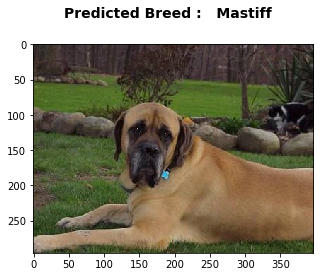

In [50]:
dog_predict_visualization(dog_img)

---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `human_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [51]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.

def predict_visualization(img_path, is_human = True):
    fig = plt.figure() 
    if is_human :
        fig.suptitle((" He ou she looks like a dog of the following breed : " + predict_breed_transfer(img_path)), fontsize=14, fontweight='bold')
    else : 
        fig.suptitle(("Predicted Breed :   " + predict_breed_transfer(img_path)), fontsize=14, fontweight='bold')
    ax = fig.add_subplot(111)
    fig.subplots_adjust(top=0.85)
    plt.imshow(plt.imread(img_path))
    
    
def run_app(img_path):
    ## handle cases for a human face, dog, and neither
    is_human = hog_face_detector(img_path)
    is_dog = dog_detector(img_path)
    if is_dog:
        predict_visualization(img_path, is_human)
    elif is_human:
        predict_visualization(img_path, is_human)
    else :
        plt.axis('off')
        plt.imshow(plt.imread(img_path))
        print("It seems that probably there is neither a dog or a human on this image")
        

---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ (Three possible points for improvement)

I think there are lot of points for improvement of our algorithm.

Firstly, I think we could improve our process with a better image preprocessing. For example with a more complete data augmentation with vertical flipping or rotation, we should easily obtain better results.

Secondly, we could also try to clean better our images. In this notebook, we paid little attention to the quality of our images (what if an image represents a human & a dog or several dogs).

Thirdly, my CNN architectures don't be very optimized. So with more time to spend to optimize my architecture & to tune my hyperparameters, we'll improve the performance of our classification algorithm. In general, I used the Python library which is called Hyperopt to add an autoML step to optimize my CNN architectures. With hyperopt I can easily try a lot of hyperparameters range, I can test other optimizers or deeper layers or add more layers.


We could also find more images of dog or an other dataset of labellized dog breed, we could implement a pipeline of models or even to build an ensemble of models ...
So there are lot of new experiments to try !

In [56]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.
new_human_images = ['./images/human_1.jpg','./images/human_2.jpg', './images/human_3.jpg', './images/human_4.jpg', './images/human_5.jpg', './images/human_6.jpg', './images/human_7.jpg'] 
new_dog_images = ['./images/dog_1.jpg', './images/dog_3.jpg', './images/dog_4.jpg', './images/dog_5.jpg']


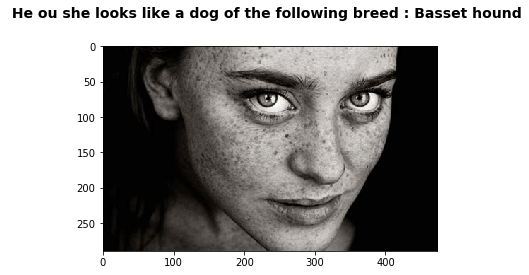

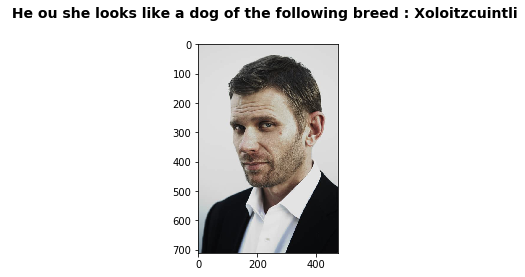

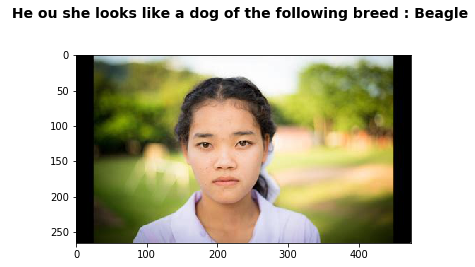

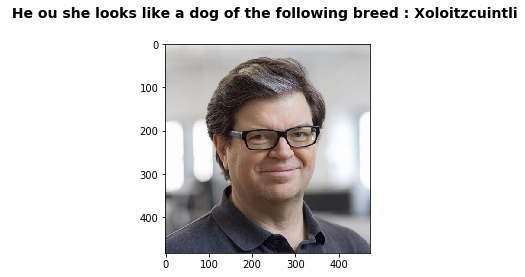

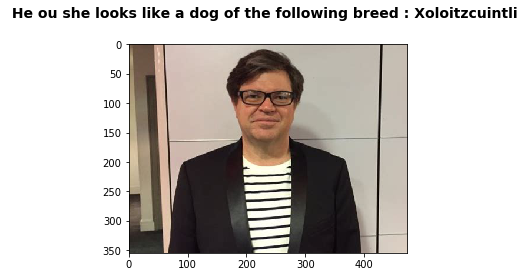

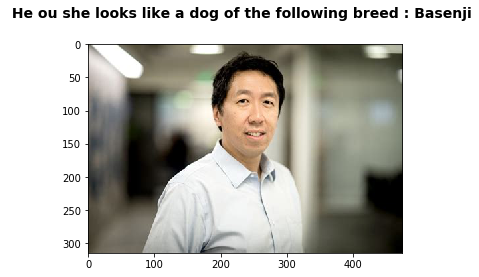

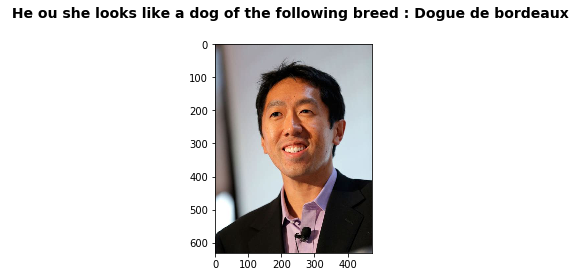

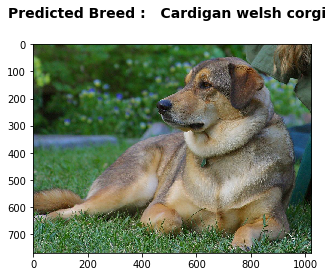

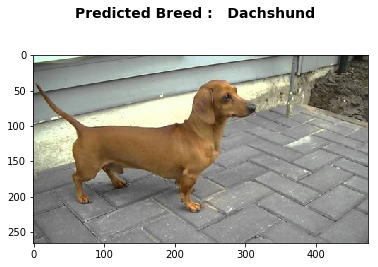

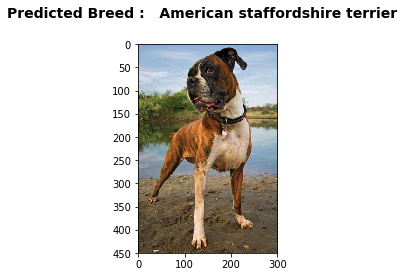

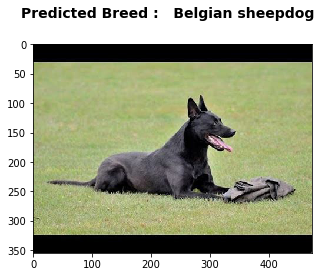

In [57]:
for file in np.hstack((new_human_images, new_dog_images)):
    run_app(file)

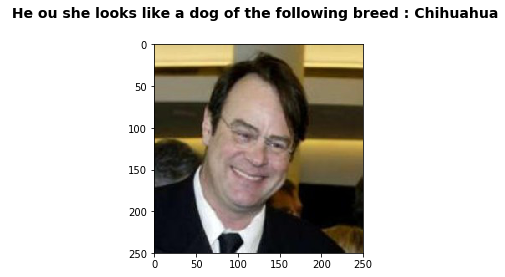

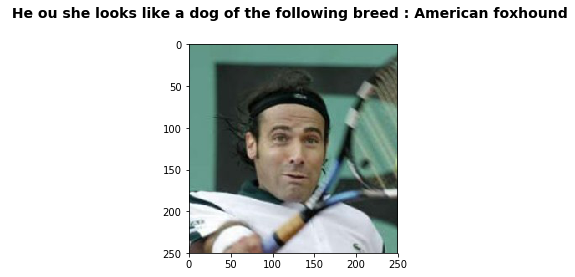

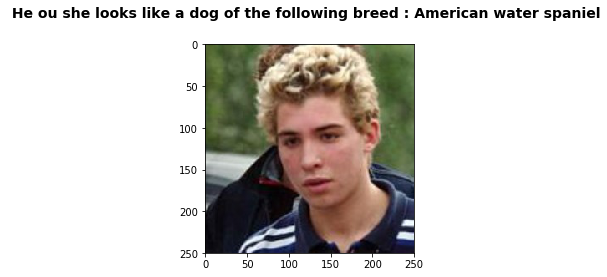

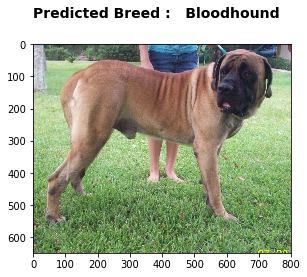

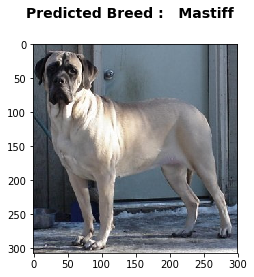

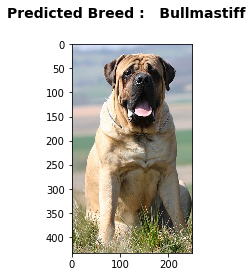

In [53]:
## suggested code, below
for file in np.hstack((human_files[:3], dog_files[:3])):
    run_app(file)